In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as rnd

# Networkx

Networkx is a Python library people commonly use when dealing with graphs. Please follow the instructions to install the package: https://networkx.org/documentation/stable/install.html. A tutorial for quick-start is also available on their webpage: https://networkx.org/documentation/stable/tutorial.html.





# $G(n,p)$

This notebook aims to empirically investigate the properties of Erdős-Rényi graphs, specifically the $G(n,p)$ model, and compare them with real-world networks. Networkx provides a convenient way to generate random graphs using built-in functions for various commonly used graph models. To create an Erdős-Rényi graph, we can use the function `nx.erdos_renyi_graph(n, p)`, where `n` is the number of nodes and `p` is the probability of an edge between two nodes. The function returns an `nx.Graph` object containing the nodes and edges of the generated graph.


In [ ]:
# Example: generate a graph from G(10, 0.1)
G_test = nx.erdos_renyi_graph(10, 0.1)
# Check how many nodes and edges it has.
print(G_test.number_of_nodes(), G_test.number_of_edges())
# Plot the graph
nx.draw(G_test)

## Statistics of $G(n,p)$ (10 pts)

In the upcoming code cell, you will be requested to generate graphs from $G(n,p)$ model with $n$ set to 100, using different values of $p$ ranging from 0.001 to 0.081, with a small step size such as 0.005. For each value of $p$, you should generate 10 graph samples from the model and report the average of the following graph statistics with error bars for std. We also provide a brief explanation on how to compute these statistics using networkx functions:

- Number of edges: To obtain the number of edges in a given nx.graph object G, you can utilize the function `G.number_of_edges()`.

- Number of triangles: Using `nx.triangles(G)`, a dictionary of (node id, number of triangles participated) key-value pairs is returned. To calculate the total number of triangles in G, simply sum all the values in the dictionary and divide the result by 3 (since each triangle is counted three times in the dictionary).

- Number of isolated nodes: If a node has degree 0, then it is an isolated node. The function G.degree is a map-like object consisting of (node id, node degree) pairs. To count the number of isolated nodes, iterate through `G.degree` and count the number of 0s in the values.

- Number of connected components: In graph theory, a connected component is a set of vertices in a graph that are linked to each other by paths. Using nx.connected_components(G), a node list generator is returned, which yields one component at a time. To get the total number of connected components, you can use `len(list(nx.connected_components(G)))`.

For each graph statistic, generate a plot where the x-axis represents the values of $p$, and the y-axis represents the average of the statistic. 

In [ ]:
# Write your code below


In [ ]:
# Generate plot with error bars for number of edges.


In [ ]:
# Generate plot with error bars for number of triangles.


In [ ]:
# Generate plot with error bars for number of isolated nodes.


In [ ]:
# Generate plot with error bars for number of connected components.


# Real world network (10pts)

## Graph statistics 

In the same folder we provide a network of character relationships within the Marvel comic book universe, saved as edgelist format named "marvel-unimodal-edges.csv". Each line in this file has the format of "character1,character2,Weight" that represents an edge connecting character1 and character2. An edgelist file can be loaded as nx.Graph as follows.

In [28]:
df = pd.read_csv("marvel-unimodal-edges.csv")
df['Weight'] = df['Weight'].astype(int)
G = nx.from_pandas_edgelist(df,'Source','Target', edge_attr='Weight')

How many nodes and edges are there in this graph? Also report the number of triangles, and number of connected components in this graph.

In [ ]:
# Report the graph statistics.


In the next cell, plot a histogram of the node degrees in this graph with bins=15.

Rank the characters by node degree and print the top 10.

## pagerank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages, see [Wiki](https://en.wikipedia.org/wiki/PageRank#:~:text=PageRank%20(PR)%20is%20an%20algorithm,the%20importance%20of%20website%20pages.). NetworkX provides a function `nx.pagerank(G, weight='weight')`.

Run pagerank on the marvel graph. Again report the characters with top 10 pagerank score. 

# Graph Laplacian and its Eigenvalues [5 pts]

## Definition

Given a graph $G=(V,E)$ of $|V|=n$ nodes with adjacency matrix $A$, and let $\deg(v)$ be the degree of a vertex $v$. The degree matrix $D$ for $G$ is a $n\times n$ diagonal matrix where $D_{i,j}=\deg(v_i)$ if $i=j$, and 0 otherwise. The Laplacian matrix of $G$ is defined as $L=D-A$, commonly used in spectral graph theory. We will explore one of its interesting properties in this section.

## Networkx

Given a networkx graph object, the library has functions to get the Laplacian matrix or the eigenvalues of the matrix. See the example below.

In [ ]:
import networkx as nx
import numpy as np

G_example = nx.Graph()
# Create a triangle graph
G_example.add_edges_from([[1,2],[2,3],[1,3]])

# laplacian_matrix(G) returns the laplacian of G in sparse matrix format
nx.laplacian_matrix(G_example).todense()

In [ ]:
# laplacian_spectrum(G) returns the eigenvalues of the laplacian.
nx.laplacian_spectrum(G_example)

In the next cell, do the following:

1. Initialize a graph that contains one triangle. 

2. Then add a disjoint triangle into the graph and report the eigenvalues of the new graph laplacian matrix. As you may noticed, the output array from the previous cell may contains small float value very close to 0, but not exactly 0 (which one of the eigenvalues should be). This is because Python has issue with representing floating-point numbers, see [here](https://docs.python.org/3/tutorial/floatingpoint.html). Therefore, Round all eigenvalues to 2 decimals using np.around function.

3. Repeat step 2 for 4 times.

Report your observation and hypothesis.

### Your answer: 

# Eigenfaces [45 pts]

## Problem Statement

In this exercise you will be using SVD to create a dictionary of eigenfaces from a training set that will be used to reconstruct faces from a testing set. 

This assignment is broken down into the following three categories and each of their sub-categories: 

Please make sure that all images are displayed in grayscale, an example of how to do this has been given in the import cell
<ol>
    <li>Data visualization
    <ol>
        <li>Display single image that contains a face from all 36 training people in the training set</li>
        <li>Display a single image that contains all faces from the 10th person in the training set</li>
        <li>Display and return the average training face</li>
    </ol></li>
    <li>Compute SVD of training data
    <ol>
        <li> Mean center your training data (subtract the average face from all training faces) </li>
        <li> Take SVD of mean-centered training data </li>
    </ol></li>
    <li>Reconstruction experiments
    <ol>
        <li> Reconstruct a face from the training set using the first $p$ rows of your SVD matrix, $U$ </li>
        <li> Experiment on different values of $p$ </li>
    </ol></li>
</ol>

## Data set description:

The data set you will be using contains images of 38 different people's faces. Each person has 64 or less images taken of their face. Each image is taken under unique lightning conditions. The "nfaces" variable loaded in and described below details how many images are associated with each participant. There are a total of 2410 images in this data set.

All images of the same participant are grouped to be in order adjacent columns in the data matrix. For instance, the first participant has 64 associated images (given in the variable n_faces), and their images are found in the first 64 columns (index 0 to 63) of the matrix. The second participant has 62 associated images, and their images are found in the next 62 columns of the matrix (index 64 to 125) and so forth.

**Your training set will comprise of all images related to the first 36 people, and your testing set will be all images of the last 2 people**

The data is stored in a matlab data file (.mat). You can think of the .mat file as a large dictionary where each key in the .mat dictionary points to some relevant information about the data. I have provided code that loads the .mat file (scipy.io.loadmat function) and have stored the following information you will need to complete this assignment:
1. m_prime = int - number of pixel rows per image
2. n_prime = int - number of pixel columns per image
3. nfaces = List - each index, i, represents the number of photos provided for participant i
4. faces = 2D numpy array ((m*n) x 2410) in shape. each column is the "flattened" image of a participants face (all 38 people)
5. trainingFaces = 2D numpy array which represents all images of the first 36 participants
6. testingFaces = 2D numpy array which represents all images of the last 2 participants

Each column in the matrices faces, trainingFaces, and testingFaces, is a "flattened" image of one of the participants. See below for the description of "falttened", and how you can reshape the image if needed. 

### Flattening and reshaping an image

When dealing with images, it is common practice to "flatten" each image from a 2D array of (m' x n') dimensions, to a 1D array of dimensions $m'*n' \times 1$ column vector. 

To flatten a 2D image to a 1D vector, simply call the function: "flattened = nd_array.flatten()"

To reshape a flatten image to its original shape ($m' \times n'$), call the following function: "original_shape_image = np.reshape(flattened, ($m'$, $n'$))" where "flattened" is the 1D flattened image

## Single Value Decomposition (SVD)

Please review the following slides regarding SVD linked <a href="https://drive.google.com/file/d/1mVzWOKpFq1qKKNNKsAzbUtSrp6QrQESz/view"> here </a>. If you are looking to gather a more intuitive sense of SVD, take a look at the "Intuitive interpretations" section of the <a href = "https://en.wikipedia.org/wiki/Singular_value_decomposition#Intuitive_interpretations">SVD wikipedia </a>, and in particular the animated gif of SVD on the wikipedia page. 

Recall that SVD factors can factor a real valued matrix, $A$, into the form $A = U \Lambda V^T$ where
1. $A$ is a real matrix of dimensions $n \times m$
2. $U$ is a real matrix of dimensions $n \times r$
3. $\Lambda$ is a real matrix of dimensions $r \times r$
4. $V$ is a real matrix of dimensions $m \times r$

Key Notes for Using SVD in this assignemnt: 
<ol>
    <li>$n$ is the number of pixels per image, and $m$ is the number of images</li>
    <li>you can use the built in np function "np.linalg.svd"; its documentation can be found <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html"> here </a>. </li>
    <li>Before taking the SVD, mean center your training data: subtract the average face from each image of your training data. 
    <li>When calling np.linalg.svd, set the parameter "full_matrices" to 0</li>
    <li>We will only be interested in one of the resulting matrices, $U$, of the decomposition. </li>
</ol>


## Eigenfaces (U)
Notice that if my original matrix, A, is a $n \times m$ matrix, then one of my decomposition matrices from SVD, $U$, has a dimension $n \times r$. Recall that we can reshape a $n$ dimensional column of my original matrix into an image of a face. As it tursn out, we can also reshape a $n$ dimensional column of $U$ into an image of a face as well.

To be more precise, we call each column of $U$ an **eigenface**. Our collection of eigenfaces or a subset of our collection, organized as a matrix, can be used to reconstruct images of faces as a linear combination of our set set of eigenfaces. Of particular interest are images that did not contribute to the SVD (images from our testing set). 

### Using Eigenfaces to reconstruct new faces
Let us define $U_p$ to be an $n \times p$ matrix that is the first $p$ columns of $U$ from the SVD of our mean-centered training set, and let us define $x$ to be an $n$ dimensional vector that is the mean centered flattened image of an image from our testing set. 

**Use the average face of the training data to also mean-center your testing image.**

Consider the following matrix multiplication $$\alpha = (U_p^T) x$$

Our resulting vector, $\alpha$ will be of dimensions $p \times 1$. Each index of $\alpha$, $i$, holds a value that represents the amount of eigenface $i$ that is needed to reconstruct $x$. In particular $$\hat{x} = \sum_{i=1}^p \alpha_i * (U_p)_i$$ in vector form: $$\hat{x} = U_p \alpha$$

Where $\hat{x}$ is our reconstruction of the original image $x$. We clearly see that $\hat{x}$ is simply a linear combination of columns from our matrix, $U$. 

[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


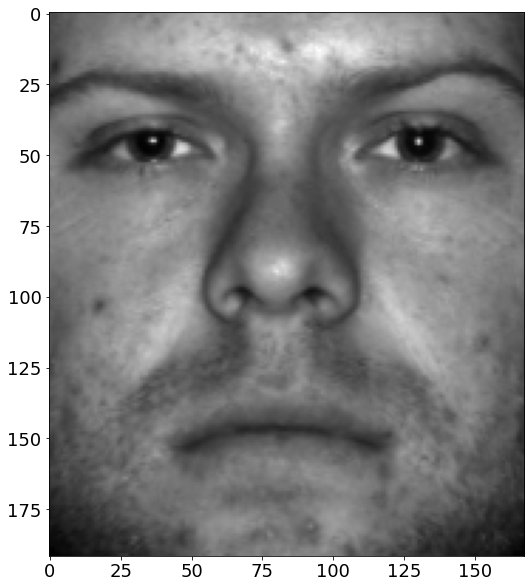

In [1]:
#import cell and data loading
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

#set as global variables that can balled in any function
mat_contents = scipy.io.loadmat(os.path.join('.','DATA','allFaces.mat'))

#common variables
faces = mat_contents['faces'] #data, where each column is a flattened image
m_prime = int(mat_contents['m']) #number of pixel rows in each image
n_prime = int(mat_contents['n']) #number of pixel cols in each image
nfaces = np.ndarray.flatten(mat_contents['nfaces']) #list of how many images per participant
trainingFaces = faces[:,:np.sum(nfaces[:36])]
testingFaces = faces[:,:np.sum(nfaces[36:])]

#example of how to display an image in gray scale
img = plt.imshow(np.reshape(testingFaces[:,0],(m_prime,n_prime)).T)
img.set_cmap('gray')

In [ ]:
def display_all_participants():
    '''
    Input: None (remember that you have access to the global variables from the import cell)
    Output: None
    
    Create a single image that contains one photo from each of the 36 training participants 
    organized as a 6 x 6 matrix of images
    '''
#     Write your code here

display_all_participants()

Here is an example output for "display_all_participants()"
![example all participants image](allparticipants.png)

In [ ]:
def display_one_participant(p_id):
    '''
    Input: 
        p_id = index of the person to be displayed 
        (remember that you have access to the global variables from the import cell)
    Output: None
    
    create and display a single image of all images of the participant at index, p_id. 
    This single image should be organized as an 8x8 image matrix, and if the participant has less than 64 images, 
    unused image matrix cells can be left as all 0's
    
    '''
#     write your code here
            
display_one_participant(0)
    

Here is an example of an output of "display_one_participant" for person_id (p_id) = 8
![example one participant image](oneparticipant.png "person 8")

In [ ]:
def average_face():
    '''
    Input: None (remember that you have access to the global variables from the import cell)
    Output: np-array - (n'*m'x 1) flattened image of the average face from the training participants
    
    Take the average of the training set to find the average face. Display the average face as well return it
    '''
#     write your code here

avg_face = average_face() #once this cell is run, you can access "avg_face" from any cell as a global variable

In [ ]:
def mean_center_SVD(avg_face):
    '''
    Input:
        avg_face = np array (n*m by 1) which is the result from "average_face()"
        (remember that you have access to the global variables from the import cell)
        
    Output:
        np-array: U from the SVD, which is a (n x r) matrix
        
    1. Take the SVD of the mean-centered training data
    2. Display the eigenface at index 0
    3. Return the matrix U.
    '''
    #     write your code here

U = mean_center_SVD(avg_face) #once this cell is run, you can call "U" is a global variable from any cell.
                              #Be sure to run "average_face()" first to have access to "avg_face"

In [6]:
def reconstruct(U, p, x, avg_face):
    '''
    Input:
        U = np array (n x r) from "mean_centered_SVD()"
        p = int, representing the first p eigenfaces to use in the reconstruction
        x = np array (n x 1) represents an original image
        avg_face = np array from "average_face()"
        (remember that you have access to the global variables from the import cell)
        
    output:
        x_hat = np array (n x 1) reconstruction of x using the eigenfaces in U
        
    Reconstruct x, x_hat, using the first p columns of U. 
    
    A few notes to remember:
        1. x_hat = Up(Up.T)x, to speed up computation, we recommend first computing alpha = (Up.T)x, and afterwards computing
            Up(alpha). 
        2. Mean center x before reconstruction
        3. Because U and x will both be mean centered, your final step in the reconstruction needs to be "x_hat += avg_face"
    '''
    #     write your code here


In [ ]:
def reconstruct_experiments(photo_index, p_list = [25, 50, 100, 200, 400]):
    '''
    Input:
        photo_index: int between 0 <= photo_index <= cols(testingFaces). represents a specific photo from testingFaces
        p_list: List, represents the values of p to be used in the reconstruction of photo at index photo_index
        
    Output:
        None
    
    Make sure this function does the following:
        1. Displays the original image to be reconstructed
        2. Displays the reconstruction of the original image for each p in p_list
        3. All reconstructions are labelled clearly as to the value of p that created that reconstructed image
    '''
    #     write your code here
        


In [ ]:
#  MAKE SURE YOU RUN THIS CELL AND HAVE OUTPUT AVAILABLE IN THE FINAL PDF!!
reconstruct_experiments(0)

# PCA (10 pts)

Implement PCA using eigendecomposition.

Let's first generate random data from a multivariate Gaussian distribution, and provide a scatter plot of the original data.

In [4]:
mu = np.array([0,5])
sigma = np.array([[1, 0.8], [0.8,1]])

org_data = rnd.multivariate_normal(mu, sigma, size=(1000))

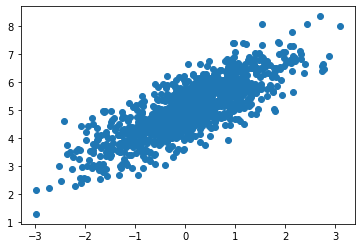

In [5]:
plt.scatter(org_data[:,0], org_data[:,1])
plt.show()

Comput the covariance matrix using `np.cov`. Data needs to be centered at zero in advance, so we should reduce both dimensions by mean.

Compute the eigenvalues and eigenvectors of the corvariance matrix, and sort by the eigenvalues.


Print the eigenvectors. What is the interpretation of them?

Transform the data by multiplying the eigenvectors, generate a scatter plot afterwards.

Sciket-learn also provide a PCA function. See https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

Use this function to transform the random data we generate. You can standardize the data with `StandardScaler`.

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
std_scaler = StandardScaler()
# Write your code below

print `pca.components_` which are the "principle" directions found by PCA, and plot how the transformed data look like. Compare with the previous results we had.

In [ ]:
print(pca.components_)

# Univariate Gaussian EM (20 pts)

## Problem statement

For this problem, I have gone out and collected a brand new data set consisting of $n=200$ data points. These data points are drawn from **one of two unknown gaussian distributions**.

To keep the notation consistent, I will use the subscript ID $k = \{0,1\}$ to represent which gaussian a parameter/variable is referring to.

For instance, $\mu_k$ represents the mean of the gaussian with ID $k$. $\mu_0$ represents the mean of the first gaussian, and $\mu_1$ represents the mean of the second gaussian

## Variable definitions

1. $k$: id of the gaussian distributions. {0,1} 
2. $n$: number of data points. 200 in this case
3. $\mu_k$: the mean of normal distribution $k$
4. $\sigma_k$: the std of normal distribution $k$
5. $\pi_k$: the prior probability of normal distribution $k$
7. $t$: current step number
8. $z_i = k$: represents the idea that i-th data point was drawn from gaussian $k$
9. $x_i$: i-th data point

## Task Description:

To make things clear, here is a list of things we do and don't know.

**Do know:**
1. Our data points, $X = x_1, x_2, ..., x_n$ for $n = 1$ to $n=200$
2. $\mu_0^{t=0}, \sigma_0^{t=0}, \pi_0^{t=0}$ which represent an initial guess for the  mean, std, and prior  of the first gaussian with ID $k=0$
3. $\mu_1^{t=0}, \sigma_1^{t=0}, \pi_1^{t=0}$ which represent an initial guess for the  mean, std, and prior  of the second gaussian with ID $k=1$
4. $\pi_0^{t=0}$ and $\pi_1^{t=0}$ which represent an initial guess for the prior probabilities of gaussian 0 and gaussian 1, respectively
5. The number of iterations your EM algorithm should run for. Do not worry about early stopping, just let it run the full number of iterations
6. Let us define the variable $\theta_k^t$ to be the set ($\hat{\mu_k^t}, \hat{\sigma_k^t}, \hat{\pi_k^t})$, which is our current estimate at time step t for the three unknown parameters of gaussian k. 

**Don't know:**
1. The true means, $\mu_0$ and $\mu_1$ for both gaussian distributions
2. The true standard deviations, $\sigma_0$ and $\sigma_1$ for both gaussian distributions 
3. Which gaussian distribution, $k=0$ or $k=1$, a point, $x_i$, came from.
4. The true fraction of our points that came from gaussian $k=0$ and the true fraction of our points that came from gaussian $k=1$ (the prior probabilities)

Note: The lecture example of EM had known priors and you were not asked to estimate the prior with EM. For this reason, the update rule for the priors, $\pi_k$, has been supplied, and you will only need to implement it correctly to find the correct priors.

Your end goal is to implement an algorithm that implements EM and returns the following:
1. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate the mean, standard deviation (std), and prior of the first gaussian with ID $k=0$
2. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate of the mean, standard deviation (std), and prior of the first gaussian with ID $k=1$


### Useful functions

1. array.shape - returns the shape as a tuple of a numpy array
2. scipy.stats.norm(mean, std).pdf(value) - returns the value pdf(val) of a gaussian distribution paramaterized by (mean, std)

### Restrictions

Failure to meet any of these conditions will result in point deductions

1. I will only be looking at the code in the function "em" below. Please make sure any computations you want to submit as your final answer are done within "em".
2. Please make a clear separation between code that computes the E step and code that computes the M step. 
    - This is done by putting all E-step related code within the E-step comment bounds, and all M-step related code within the M-step comment bounds
3. Do not change the values of any variables marked with the comment "DO NOT CHANGE"
4. Your final answer must not use any libraries other than the ones already imported (numpy and scipy.stats)
5. Your final answer must not use any functions in scipy.stats besides scipy.stats.norm(mean, std).pdf(value) which is defined above
6. If you are copying the code over to a .py file, the restrictions above still apply!! Please make sure to copy over the comment bounds as well
7. do not change the input and output of "load" or "em" in the cell below
8. Please do not have any calls to helper functions in your final answer

### Task Order
1. Determine the update rules for $\mu_k^{t+1}$ and $\sigma_k^{t+1}$ and write them in the cell below
2. Code the E and M step
3. Run and test your code on "EM_dataset.py"


## E - Step (6 pts)
$P(z_i = k | x_i, \theta_k^t)$ reflects the responsibility the k-th gaussian has for the i-th data point
$$P(z_i = k | x_i, \theta_k^t) = \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{P(x_i | \theta_k^t)}$$ \
$$= \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{\sum_{k=0}^{1}P(x_i | z_i = k, \theta_k^t)*\pi_k^t}$$



## M - Step (10 pts)


$$\mu_k^{t+1} = \ ??$$

$$\sigma_k^{t+1} = \ ??$$

$$\pi_k^{t+1} = \frac{\sum_{i=1}^n P(z_i = k | x_i, \theta_k^t)}{n}$$


**hint 1: You will need to use the result of your E-step, $P(z_i = k | x_i, \theta_k^t)$, in your update rules for $\mu_k^{t+1}$ and $\sigma_k^{t+1}$**

### (Double click to edit cell)

Please write your update rule for:
$\mu_k^{t+1}$ = 


Please write your update rule for: $\sigma_k^{t+1}$ = 

In [2]:
import scipy.stats
import numpy as np

def load(path):
    dataset = np.load(path)
    return dataset

def em(dataset, k, n_iterations):
    '''
    Input:
        dataset - np array - containing the data
        k - int - representing the number of underlying gaussian distributions
        n_iterations - int - representing number of iterations EM should run for
        
    output:
        mus - np array shape (2,) - mus[k] is the EM estimate of the mean of the kth gaussian
        sigmas - np array shape (2,) - sigmas[k] is the EM estimate of the stdev of the kth gaussian
        pi - np array shape (2,) - pis[j] is the EM estimate of the prior of the kth gaussian
    '''
    n_samples = dataset.shape[0]

    # Initial guesses for the parameters DO NOT CHANGE
    FINAL_INITIAL_MUS = np.asarray([90, 210]) #DO NOT CHANGE
    FINAL_INITIAL_SIGMAS = np.asarray([28,19]) #DO NOT CHANGE
    FINAL_INITIAL_PIS = np.asarray([0.3,.7]) #DO NOT CHANGE
    pis = FINAL_INITIAL_PIS #DO NOT CHANGE
    mus = FINAL_INITIAL_MUS #DO NOT CHANGE
    sigmas = FINAL_INITIAL_SIGMAS #DO NOT CHANGE
            
    for em_iter in (range(n_iterations)):
            #E Step
            '''YOUR E STEP CODE GOES HERE'''
            pass #remove this line when running your code
            
            
            
            '''E STEP CODE END'''
            
            #M step
            '''YOUR M STEP CODE GOES HERE'''
            
            
            
            
            '''M STEP CODE END'''

    return pis, mus, sigmas

def main():
    
    n_iterations = 20 #DO NOT CHANGE
    k = 2 #DO NOT CHANGE
    
    '''YOUR TEST CODE HERE'''
    #load dataset. assumes data file is in same directory as code file
    dataset = np.load("EM_dataset.npy")
    pis, mus, sigmas = em(dataset, k, n_iterations)

    
main()